In [28]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
sns.set()

tfe = tf.contrib.eager
tfd = tfp.distributions

In [4]:
tf.enable_eager_execution()

In [71]:
def toy_data(num_data=30):
    
    true_w = np.random.randn()
    true_b = np.random.randn()
    
    x = (np.random.rand(num_data) - 0.5) * 10
    y = true_w * x + true_b + 0.3 * np.random.randn(num_data)
    
    return x, y, true_w, true_b

In [72]:
x, y, true_w, true_b = toy_data()

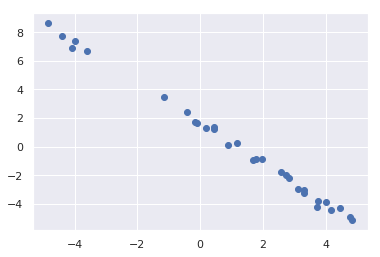

In [73]:
plt.scatter(x, y)

In [103]:
class BayesLinearRegression(tf.keras.Model):
    
    def __init__(self):
        super(BayesLinearRegression, self).__init__()
        
#         self.w_loc = tf.get_variable(name='w', shape=[])
#         self.b_loc = tf.get_variable(name='b', shape=[])

        self.w_loc = tfe.Variable(initial_value=tf.random_normal(shape=[]))
        self.b_loc = tfe.Variable(initial_value=tf.random_normal(shape=[]))
    
    def call(self, x, num_samples=1):
        
        dist = self._get_dist(x)
        ## y.shape == (num_sample, num_data)
        y = dist.sample(num_samples)
        return y
    
    def loss(self, x, y):
        y = self(x)

    def _get_dist(self, x):
        
        w = tfd.Normal(loc=self.w_loc, scale=1.).sample()
        b = tfd.Normal(loc=self.b_loc, scale=1.).sample()
        loc = w * x + b
        return tfd.Normal(loc=loc, scale=1.)

In [105]:
model = BayesLinearRegression()
y_predict= model(x)

/home/hikaru/.local/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


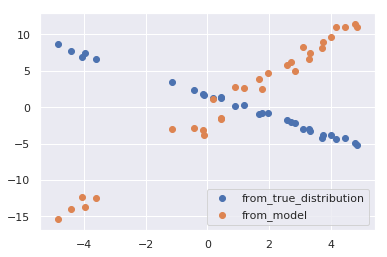

In [106]:
plt.scatter(x, y)
plt.scatter(x, y_predict)
plt.legend(["from_true_distribution", "from_model"])